# **Final Project**
## Data Analytics 1 Fall 2023

### Jun Hanvey and Kellen Nankervis


# Starbucks Marketing Strategy
While Starbucks is one of the most popular coffee chains worldwide, no marketing strategy is perfect. Our objective on this project is to determine how Starbucks can change their methods in order to increase transaction amount per customer.


In [127]:
# Import important libraries
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt, statsmodels.formula as smf
#from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.formula import api as smf

#drive.mount('drive', force_remount=True)

In [128]:
# Assign working directory and read in data
#fpath = ('drive/MyDrive/Anly6100/')
fpath = ('D:/CompSci/ANLY6100/Final_Project/')
df = pd.read_csv(fpath + 'starbucks_promos.csv', index_col = 0)
df.head()



,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1
4,005500a7188546ff8a767329a2f7c76a,offer received,0,M,56,20171209,47000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,NaN,NaN,0
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1


# Data Cleaning



In [129]:
# Remove the rows with missing values and reset the index
df = df.dropna()
df = df.reset_index(drop=True)

# Reorder the columns so that the target variable (transaction_amount) is at the beginning followed by the features
df = df.iloc[:, [0,1,2,14,3,4,5,6,7,8,9,10,11,12,13,15,16]]

# view how many unique values are in each column
df.nunique()

# Convert offer difficulty to a categorical variable
df['difficulty'] = df['difficulty'].astype('category')

df.head()


,uid,event,time,transaction_amount,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,redeem_time,redeemed
0,0020c2b971eb4e9188eac86d93036a77,offer received,0,17.63,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,54.0,1
1,0056df74b63b4298809f0b375a304cf4,offer received,0,27.86,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,132.0,1
2,00715b6e55c3431cb56ff7307eb19675,offer received,0,27.26,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,12.0,1
3,00840a2ca5d2408e982d56544dc14ffd,offer received,0,6.05,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,540.0,1
4,0091d2b6a5ea4defaa8393e4e816db60,offer received,0,18.26,F,62,20160617,81000.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,"['web', 'email', 'mobile', 'social']",10.0,120.0,bogo,0.0,6.0,1


In [130]:
# Show the unique values of the categorical variables
df.select_dtypes(include = 'object').nunique()

# Save the cleaned data to a csv file
df.to_csv(fpath + 'starbucks_cleaned.csv')

# Print the shape of the data
print(df.shape)

df.head()

(31026, 17)


,uid,event,time,transaction_amount,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,redeem_time,redeemed
0,0020c2b971eb4e9188eac86d93036a77,offer received,0,17.63,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,54.0,1
1,0056df74b63b4298809f0b375a304cf4,offer received,0,27.86,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,132.0,1
2,00715b6e55c3431cb56ff7307eb19675,offer received,0,27.26,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,12.0,1
3,00840a2ca5d2408e982d56544dc14ffd,offer received,0,6.05,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,540.0,1
4,0091d2b6a5ea4defaa8393e4e816db60,offer received,0,18.26,F,62,20160617,81000.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,"['web', 'email', 'mobile', 'social']",10.0,120.0,bogo,0.0,6.0,1


# **Exploratory Data Analysis**

In [131]:
# Look at the correlations of the numeric variables
df.corr(numeric_only = True)

# From this it appears that older customers spend more money and that customers who have a higher income spend more money.

,time,transaction_amount,age,register_date,income,offer_reward,duration,offer_time,redeem_time,redeemed
time,1.000000,0.003674,0.001206,-0.003625,-0.001097,0.000665,-0.013978,1.000000,0.917922,NaN
transaction_amount,0.003674,1.000000,0.061458,0.014430,0.153702,0.047228,0.006744,0.003674,-0.005752,NaN
age,0.001206,0.061458,1.000000,0.006327,0.314453,0.031758,-0.008370,0.001206,-0.007667,NaN
register_date,-0.003625,0.014430,0.006327,1.000000,0.005313,0.022830,-0.013392,-0.003625,0.016353,NaN
income,-0.001097,0.153702,0.314453,0.005313,1.000000,0.078920,-0.016728,-0.001097,-0.028451,NaN
offer_reward,0.000665,0.047228,0.031758,0.022830,0.078920,1.000000,-0.460156,0.000665,-0.025015,NaN
duration,-0.013978,0.006744,-0.008370,-0.013392,-0.016728,-0.460156,1.000000,-0.013978,0.055949,NaN
offer_time,1.000000,0.003674,0.001206,-0.003625,-0.001097,0.000665,-0.013978,1.000000,0.917922,NaN
redeem_time,0.917922,-0.005752,-0.007667,0.016353,-0.028451,-0.025015,0.055949,0.917922,1.000000,NaN
redeemed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


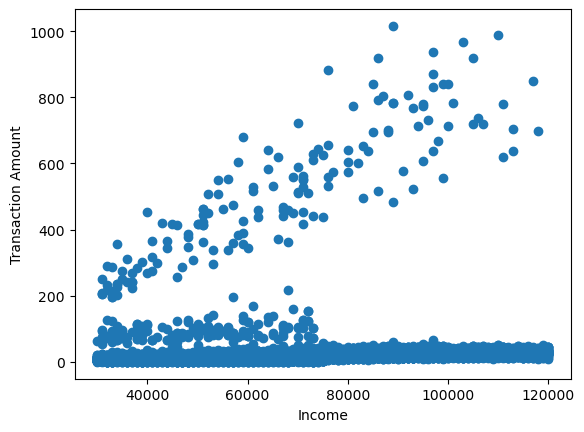

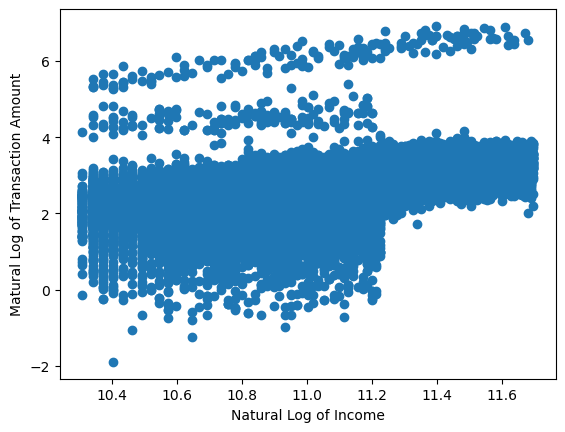

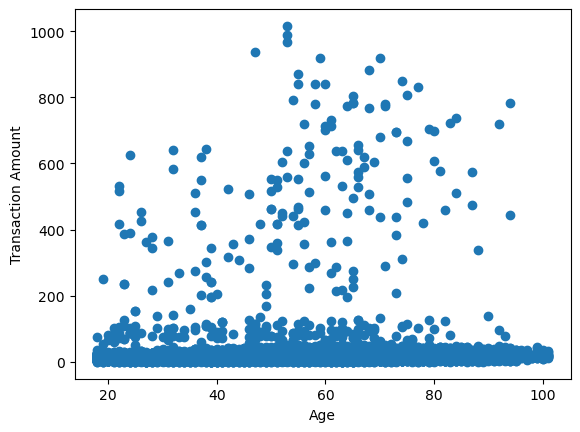

In [132]:
# Create a scatterplot matrix of the transaction amount against income and age
plt.scatter(df.income, df.transaction_amount)
plt.xlabel('Income')
plt.ylabel('Transaction Amount')
plt.show()
# It looks like the transaction amounts could be broken up into destinct groups and analysed for a pattern seperatly, but overall they are clearly positively correlated.

# Take the natural log of the transaction amount and the income and plot them against each other
plt.scatter(np.log(df.income), np.log(df.transaction_amount))
plt.xlabel('Natural Log of Income')
plt.ylabel('Matural Log of Transaction Amount')
plt.show()

# That does look slightly better, but it is still not a great fit.

plt.scatter(df.age, df.transaction_amount)
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()

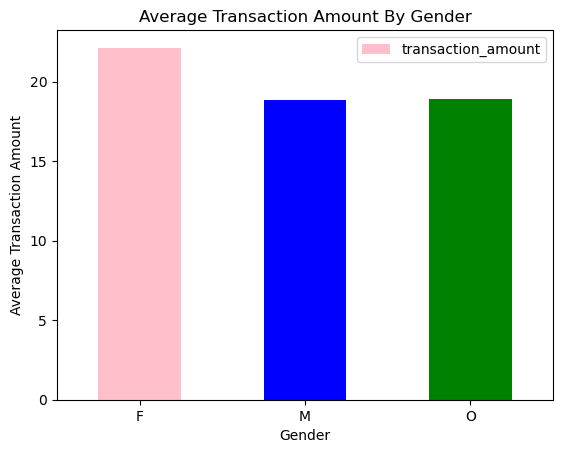

In [133]:
# Look at which gender spends the most money on average
df_gender_spending = df.groupby('gender').transaction_amount.mean().reset_index()

df_gender_spending.head()

colors = ['pink', 'blue', 'green']
df_gender_spending.plot(kind='bar', x='gender', y='transaction_amount', rot=0, color=colors).set_xticklabels(df_gender_spending.gender)
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount By Gender')
plt.show()

# We can see that females are more likely to spend than males or other genders.

In [134]:
# Break the age into bins
df['age_bins'] = pd.cut(x=df['age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# Show the number of entries in each bin
df.age_bins.value_counts()



(50, 60]     7920
(60, 70]     6403
(40, 50]     4936
(70, 80]     3604
(30, 40]     3098
(20, 30]     2349
(80, 90]     1711
(0, 20]       515
(90, 100]     480
Name: age_bins, dtype: int64

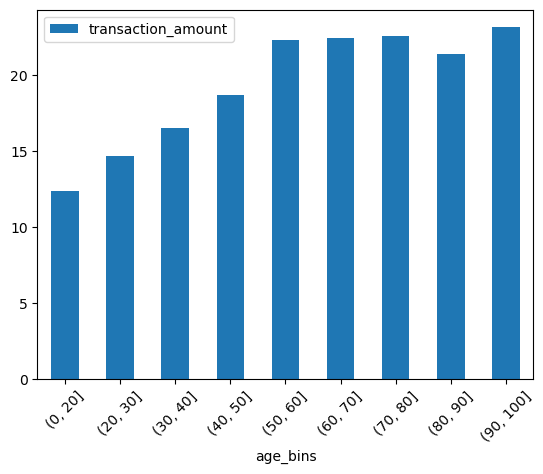

In [135]:
# Look at the average transaction amount by age bin
df_age_spending = df.groupby('age_bins').transaction_amount.mean().reset_index()
df_age_spending.plot(kind='bar', x='age_bins', y='transaction_amount', rot=45).set_xticklabels(df_age_spending.age_bins)
plt.show()

# It seems that age groups past 50 spend the most money per transaction on average.

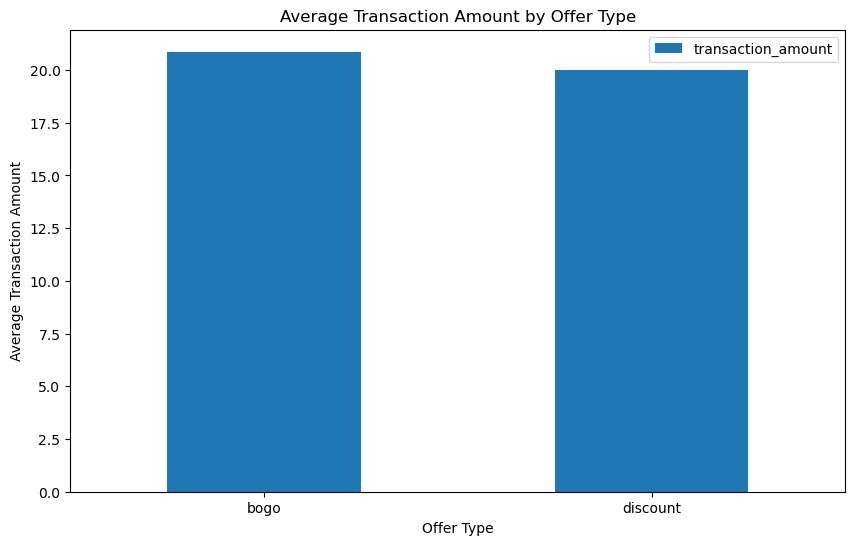

In [136]:
# See if Bogo or Discount promotions tend to have higher transaction amounts
df_promo_spending = df.groupby('offer_type')['transaction_amount'].mean().reset_index()

# Plotting the bar chart with a larger x-axis
fig, ax = plt.subplots(figsize=(10, 6))
df_promo_spending.plot(kind='bar', x='offer_type', y='transaction_amount', rot=0, ax=ax)
plt.xlabel('Offer Type')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Offer Type')
plt.show()

# It appears that bogo offers are more effective at driving up the average transaction amount than discount offers.


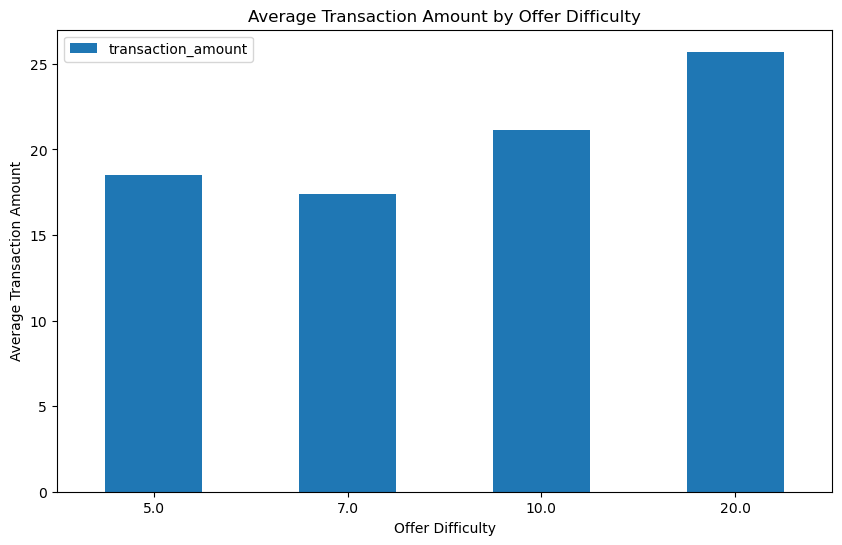

In [137]:
# See if the offer difficulty has an effect on the average transaction amount
df_difficulty_spending = df.groupby('difficulty')['transaction_amount'].mean().reset_index()

# Plotting the bar chart with a larger x-axis
fig, ax = plt.subplots(figsize=(10, 6))
df_difficulty_spending.plot(kind='bar', x='difficulty', y='transaction_amount', rot=0, ax=ax)
plt.xlabel('Offer Difficulty')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Offer Difficulty')
plt.show()

# It appears that the difficulty of the offer does seem to have an effect on the average transaction amount, with the higher difficulty offers having a higher average transaction amount.

# **Model Creation**

In [147]:
# Create a regression model to predict the transaction amount based on gender, age, Natural log of income, offer type, and offer difficulty
res = smf.ols('transaction_amount ~ gender + age + np.log(income) + offer_type + difficulty', data=df).fit()
print(res.summary())

# It appears that the all the variables are significant in the model.

                            OLS Regression Results                            
Dep. Variable:     transaction_amount   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 13 Dec 2023   Prob (F-statistic):          3.78e-171
Time:                        01:22:40   Log-Likelihood:            -1.5781e+05
No. Observations:               31026   AIC:                         3.156e+05
Df Residuals:                   31017   BIC:                         3.157e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -164

C:\Users\grave\AppData\Local\Temp\ipykernel_28088\3905888368.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income[i] = (df_age_income[i] - df_age_income[i].mean())/df_age_income[i].std()


Text(0, 0.5, 'Income')

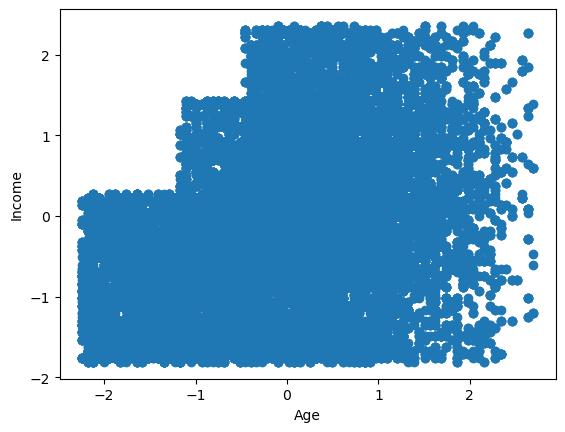

In [139]:
# Use K-means clustering to see if there are any natural groupings in the data amoung age and income
# Create a dataframe with just the age and income columns
df_age_income = df[['age', 'income']]

# Standardize the data
for i in df_age_income.columns:
    df_age_income[i] = (df_age_income[i] - df_age_income[i].mean())/df_age_income[i].std()

# Plot the data
plt.scatter(df_age_income.age, df_age_income.income)
plt.xlabel('Age')
plt.ylabel('Income')




In [140]:
df_age_income.head()

,age,income
0,0.197267,0.966655
1,-0.099783,1.012914
2,0.137857,2.308161
3,-1.763261,-0.374851
4,0.375497,0.550326


In [141]:
# Run K-means clustering with i clusters
elbowdata = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_age_income[['age', 'income']])
    df_age_income['seg' + str(k)] = kmeans.labels_
    elbowdata.append(kmeans.inertia_)
    print(kmeans.inertia_)

c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


34501.18472391475


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


23128.710244521502


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


18245.524957941252


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


14605.976342190084


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


12510.30213042649


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


10805.663579819853


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9547.559986740713


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_
c:\Users\grave\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8506.068578382608
7661.281859473876


C:\Users\grave\AppData\Local\Temp\ipykernel_28088\1809070811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_income['seg' + str(k)] = kmeans.labels_


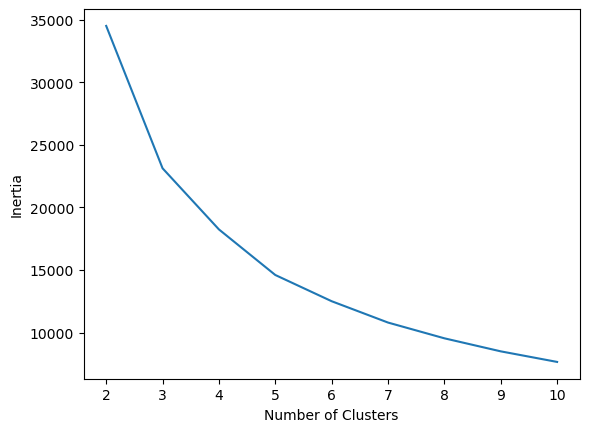

In [142]:
# Plot the elbow plot
plt.plot(range(2, 11), elbowdata)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# It seems to me that 5 clusters is the best number to me.

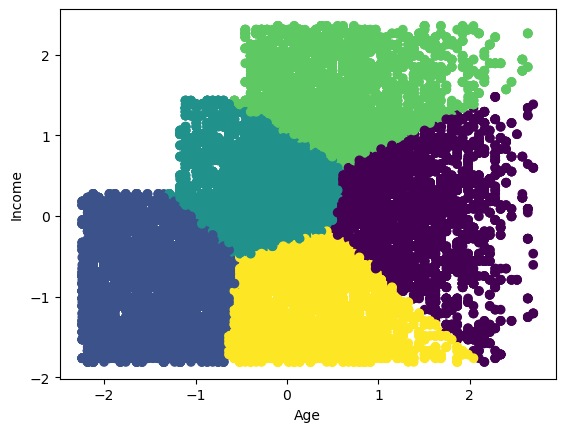

In [143]:
# Plot the clusters based on age and income
plt.scatter(df_age_income.age, df_age_income.income, c=df_age_income.seg5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [144]:
# Add the cluster labels to the original dataframe
df['cluster'] = df_age_income['seg5']


In [145]:
# Look at the average transaction amount by cluster
df_cluster_spending = df.groupby('cluster').transaction_amount.mean().reset_index()

df_cluster_spending.head()

,cluster,transaction_amount
0,0,20.874311
1,1,14.747806
2,2,22.074735
3,3,30.484621
4,4,14.707335


In [146]:
# It seems that cluster 0 spends the most money per transaction on average (the cluster # might change if you rerun the code just FYI). Lets look at the average age and income of each cluster.
df_cluster_age_income = df.groupby('cluster')[['age', 'income']].mean().reset_index()

df_cluster_age_income.head()

# From this it seems that we should target our advertizing towards people aged roughly 60-70 with an income of roughly 85,000-115,000 if we best want to increase transaction prices per customer as this group spends the most on average.

,cluster,age,income
0,0,77.675765,70244.623656
1,1,32.054548,51494.895627
2,2,52.192375,76455.856534
3,3,64.771541,101573.292814
4,4,59.908566,47611.156957


-Increase transaction amount
-Exploratory data analysis
-Graphs by age and gender and discount type/difficulty income  
